# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [53]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

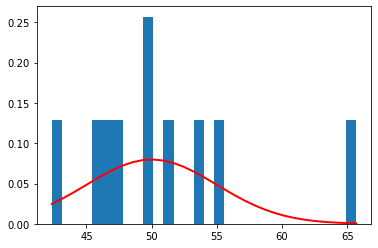

NormaltestResult(statistic=6.737966826816913, pvalue=0.034424615163663325)


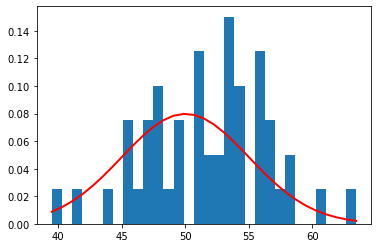

NormaltestResult(statistic=0.3252314895432945, pvalue=0.8499177110006888)


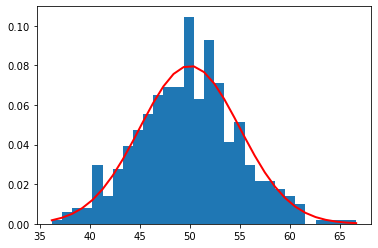

NormaltestResult(statistic=0.9154572519358979, pvalue=0.6327191564601731)


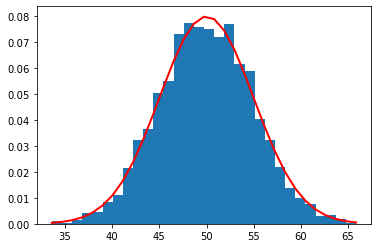

NormaltestResult(statistic=2.604761805748752, pvalue=0.2718836931422235)


In [43]:
# Your code here
mu, sigma = 50, 5
sample_size = [10, 50, 500, 5000]
for i in sample_size:
    s = np.random.normal(mu, sigma, i)
    count, bins, ignored = plt.hist(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
    plt.show()
    print(stats.normaltest(s))

#### Interpret the normaltest results and make your observations.

In [40]:
# Explain the test results here
# Si el segundo numero devuelto por la función "normaltest" (pvalues) es muy pequeño, la distribución
# no se considera una distribución normal

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# El teorema central del límite asegura que, cuando sumamos un número grande de variables
# la variable resultante sigue una distribución normal.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

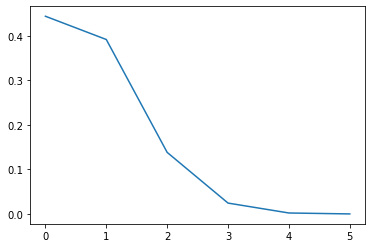

In [113]:
# Your code here
n = 5
p = 0.15
k = np.arange(0, 6)
binomial = stats.binom.pmf(k, n, p)
fig, ax = plt.subplots(1, 1)
ax.plot(binomial)

#### Explain what you observe from the plot above

In [66]:
# Your comment here
# El eje de las x muestra los casos de éxito (que clicken en un anuncio) y el eje y la probabilidad de que 
# ocurra

#### Now plot PMP with 50, 500, and 5000 visitors.

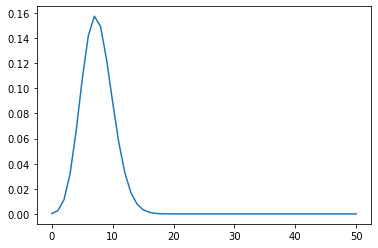

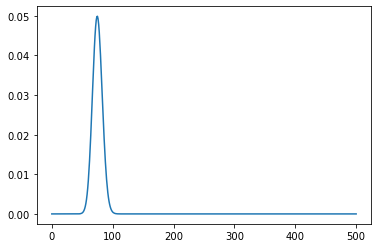

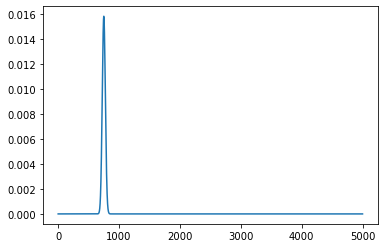

In [112]:
# Your code here
visitantes = [50, 500, 5000]
p = 0.15
for i in visitantes:
    k = np.arange(0, i+1)
    binomial = stats.binom.pmf(k, i, p)
    fig, ax = plt.subplots(1, 1)
    ax.plot(binomial)

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
# El 15% de probabilidad de que una persona le de a un anuncio, ese 15% se muestra en la muestra estudiada

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# Es la distriución qu emuestra la probabilidad de que ocurra un suceso en un periodo de tiempo

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [117]:
# Your code here
p = stats.poisson.pmf(320, 300)
p

0.011612348610402475

#### What is the probability of getting 60 visits?

In [119]:
# Your code here
r = stats.poisson.pmf(60, 300)
r

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

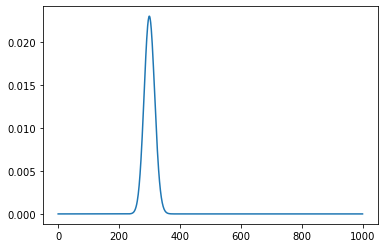

In [123]:
# your code here
fig, ax = plt.subplots(1, 1)
poisson_list = [stats.poisson.pmf(i, 300) for i in range(1001)]
x = np.arange(1001)
ax.plot(x, poisson_list)